 IMPORT LIBRARIES AND DATASET

In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd

In [75]:
# Load dataset 
from keras.datasets import mnist
((x_train, y_train),(x_test, y_test))= mnist.load_data()

<function matplotlib.pyplot.show(*args, **kw)>

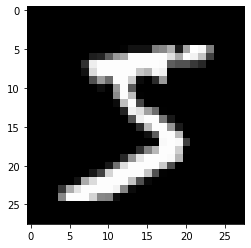

In [76]:
# Visualize a sample image
plt.imshow(x_train[0], cmap =plt.get_cmap('gray'))
plt.show

In [77]:
# check out the shape of the training data
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [78]:
# check out the shape of the testing data
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


PERFORM DATA VISUALIZATION

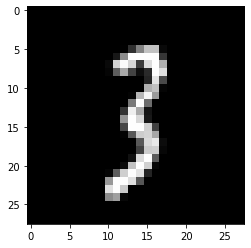

In [79]:
# Let's view some images!
i= np.random.randint(0,60000)
plt.imshow(x_train[i], cmap = 'gray')

In [80]:
label = y_train[i]
label

3

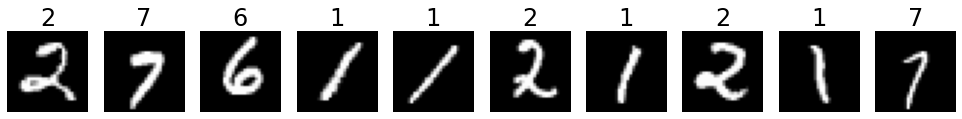

In [81]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
w_grid = 10
l_grid = 1

# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, ax = plt.subplots(l_grid, w_grid, figsize =(17,2))
ax = ax.ravel()
n_training = len(x_train)

for i in np.arange(0, w_grid*l_grid ):
    idx = np.random.randint(0, n_training )
    ax[i].imshow (x_train[idx],cmap='gray')
    ax[i].set_title(y_train[idx], fontsize=24)
    ax[i].axis ('off')


 PERFORM DATA PREPROCESSING

In [82]:
# normalize data
x_train=x_train/255.0
x_test=x_test/255.0


In [83]:
# add some noise
noise_factor = 0.3
noise_dataset = []
for img in x_train:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)    ## clip is used to limit the level of noisy_image between 0, 1
    noise_dataset.append ( noisy_image)

In [84]:
noise_dataset = np.array(noise_dataset)  ## covert list to an array 

In [85]:
# adding noise to test dataset
noise_factor = 0.1
noise_test_dataset = []
for img in x_test:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append ( noisy_image)

In [86]:
noise_test_dataset = np.array(noise_test_dataset)

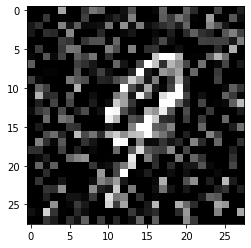

In [87]:
plt.imshow( noise_dataset[22], cmap = 'gray')

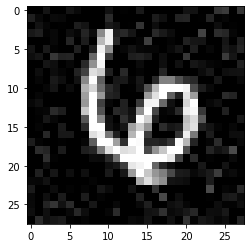

In [88]:
plt.imshow( noise_test_dataset[22], cmap = 'gray')

BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [89]:
autoencoder = tf.keras.models.Sequential() # for creating layers one after one 
## encoder 
autoencoder.add(tf.keras.layers.Conv2D(filters =16, kernel_size =3,strides =2, padding='same',input_shape =(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters =8, kernel_size =3,strides =2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters =8, kernel_size =3,strides =1, padding='same'))
## decoder
## we use Conv2DTranspose for deconvolution
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters =16, kernel_size =3,strides =2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters =1, kernel_size =3,strides =2, activation = 'sigmoid', padding='same'))

In [90]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
                                              ## Here metrics is used to track the accuracy of the model 
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs = 3,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 39s 652us/sample - loss: 0.0936 - accuracy: 0.8145 - val_loss: 0.0782 - val_accuracy: 0.8142
Epoch 2/3
60000/60000 [==============================] - 39s 655us/sample - loss: 0.0912 - accuracy: 0.8147 - val_loss: 0.0764 - val_accuracy: 0.8143
Epoch 3/3
60000/60000 [==============================] - 40s 674us/sample - loss: 0.0900 - accuracy: 0.8148 - val_loss: 0.0755 - val_accuracy: 0.8143


EVALUATE TRAINED MODEL PERFORMANCE

In [107]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1),x_test.reshape(-1, 28, 28, 1))
print ('test loss', evaluation)

10000/10000 [==============================] - 4s 363us/sample - loss: 0.0755 - accuracy: 0.8143
test loss [0.07549577869176864, 0.81429845]


In [108]:
predicted=autoencoder.predict(noise_test_dataset[10:1000].reshape(-1, 28, 28, 1))

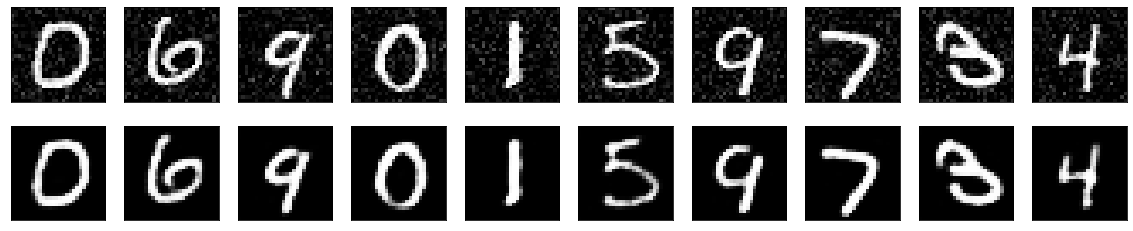

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[10:1000], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

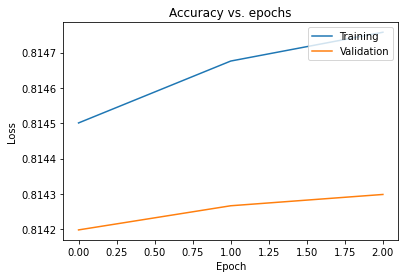

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accurac')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

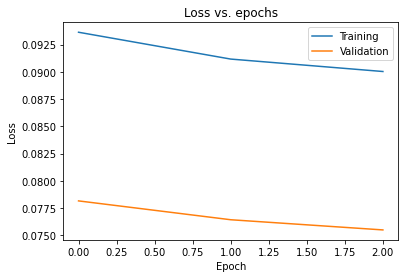

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 